<a href="https://colab.research.google.com/github/imnadiarasheed/ML/blob/main/Assign_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 128)     

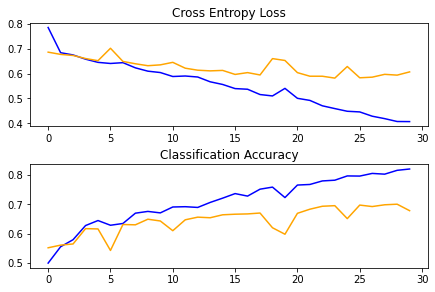

In [ ]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dropout(0.5))
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 model.summary()
 return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 pyplot.tight_layout(pad=.5)
 pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
 # define model
 model = define_model()
 # create data generator
 datagen = ImageDataGenerator(rescale=1.0/255.0)
 # prepare iterators
 train_it = datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/ML/Assignment-4/Dataset/dogs-vs-cat-small/train/',
 class_mode='binary', batch_size=64, target_size=(150, 150))
 vali_it = datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/ML/Assignment-4/Dataset/dogs-vs-cat-small/validation/',
 class_mode='binary', batch_size=64, target_size=(150, 150))
 test_it = datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/ML/Assignment-4/Dataset/dogs-vs-cat-small/test/',
 class_mode='binary', batch_size=64, target_size=(150, 150))
 # fit model
 history = model.fit(train_it, steps_per_epoch=len(train_it),
 validation_data=vali_it, validation_steps=len(vali_it), epochs=30, verbose=1)
 # evaluate model
 test_loss, test_acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
 print('Accuracy > %.3f' % (test_acc * 100.0))
 print('Loss > %.3f' % (test_loss * 100.0))
 # learning curves
 summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()